# 1. Importing Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import warnings
from collections import Counter
import plotly.express as px

import re
import time
import math
from datetime import datetime as dt

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)

plt.style.use('dark_background')
# 'dark_background'


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#Let see if there rows duplicated and drop them if there are
df.duplicated().sum()

1081

In [6]:
#Now we have to drop them and look if there not any more repeated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

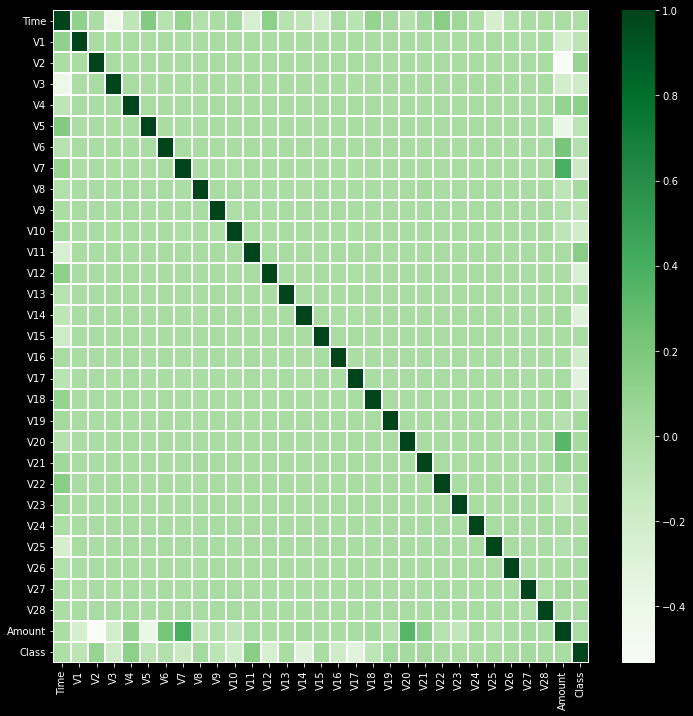

In [7]:
#Let see how looks the correlation matrix of the Dataframe
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap="Greens",linewidths = 0.1)
plt.show()

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


***
***
# 2. Preprocessing

In [9]:
X = df.drop(columns=['Class'])
y = df['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=100,test_size=0.2)
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,stratify=y_train,random_state=100,test_size=0.25)

print(f"Training dataset size { X_train.shape}")
print(f"Validation dataset size { X_val.shape}")
print(f"Training dataset size { X_test.shape}")

Training dataset size (170235, 30)
Validation dataset size (56745, 30)
Training dataset size (56746, 30)


***

- Now let's scaled the variable of Amount, we don't need to scaled the other variables because they're already scaled.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Time']

X_train[columns] = scaler.fit_transform(X_train[columns])
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
213157,0.805234,0.992643,0.773641,0.745116,0.266264,0.508807,0.534653,0.531069,0.805008,0.467818,...,0.607714,0.556728,0.419280,0.675007,0.513162,0.610946,0.395540,0.648153,0.256225,0.000225
192376,0.750427,0.922926,0.800581,0.755232,0.227290,0.494904,0.555493,0.494050,0.723184,0.433477,...,0.651555,0.496861,0.491240,0.681994,0.411281,0.591981,0.387077,0.653678,0.261482,0.001226
211536,0.801310,0.924755,0.804571,0.785133,0.428595,0.495502,0.572452,0.521569,0.802512,0.496793,...,0.640233,0.570854,0.466034,0.671749,0.308618,0.639745,0.470147,0.689095,0.271473,0.000793
213542,0.806172,0.888723,0.798139,0.751314,0.146247,0.470241,0.534021,0.499696,0.839884,0.470131,...,0.596588,0.563022,0.423617,0.669176,0.523219,0.656831,0.291918,0.619062,0.249030,0.000453
278611,0.974159,0.954450,0.782310,0.734474,0.182298,0.542620,0.614746,0.529842,0.821255,0.451355,...,0.609212,0.556816,0.411018,0.672577,0.499723,0.604814,0.400116,0.653363,0.257255,0.001038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17521,0.166592,0.942638,0.784547,0.813082,0.228176,0.495972,0.524268,0.534926,0.810122,0.454621,...,0.608439,0.559458,0.442707,0.669841,0.521182,0.615192,0.419386,0.655128,0.259727,0.000114
80649,0.339065,0.976086,0.770224,0.810014,0.304746,0.494173,0.568746,0.518217,0.812451,0.483148,...,0.604702,0.564994,0.499737,0.669480,0.370283,0.647270,0.335100,0.652619,0.257404,0.000114
42582,0.238218,0.953572,0.796322,0.691862,0.261248,0.549339,0.597250,0.534159,0.814360,0.479329,...,0.626914,0.555701,0.431309,0.671031,0.506411,0.620616,0.292339,0.652469,0.251329,0.000101
278631,0.974194,0.940759,0.783141,0.765677,0.205706,0.518312,0.548858,0.539861,0.811989,0.453947,...,0.615158,0.558708,0.431831,0.666354,0.184774,0.649833,0.369863,0.655929,0.259497,0.008701


In [12]:
X_val[columns] = scaler.transform(X_val[columns])
X_val

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
99930,0.389757,0.933667,0.761019,0.806998,0.208618,0.504906,0.517957,0.530911,0.805128,0.409264,...,0.596020,0.549755,0.376227,0.687697,0.479267,0.611094,0.471623,0.639361,0.262263,0.000226
282057,0.987516,0.937774,0.774434,0.769789,0.164231,0.559791,0.609422,0.532508,0.817138,0.440071,...,0.613153,0.556648,0.395608,0.667189,0.500747,0.667572,0.416629,0.648400,0.258506,0.000225
96491,0.380793,0.935858,0.779415,0.814919,0.256812,0.505589,0.531069,0.535151,0.808194,0.445061,...,0.610182,0.558284,0.444918,0.678175,0.472196,0.619422,0.380995,0.648312,0.252133,0.001022
166183,0.682424,0.976869,0.742231,0.751875,0.217949,0.484892,0.558475,0.522768,0.806585,0.456185,...,0.635655,0.573570,0.504854,0.664031,0.443203,0.607412,0.345191,0.647275,0.257990,0.064162
248339,0.890675,0.937894,0.784019,0.767728,0.159298,0.491488,0.517762,0.535118,0.807509,0.425938,...,0.616700,0.563343,0.478754,0.672262,0.491659,0.618427,0.292964,0.655740,0.262890,0.005688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87350,0.356757,0.949760,0.769761,0.819697,0.243813,0.492266,0.594907,0.550513,0.802460,0.444081,...,0.595446,0.552399,0.445926,0.670688,0.312583,0.604110,0.283600,0.637437,0.240837,0.031949
122946,0.444206,0.894966,0.734191,0.823119,0.258950,0.510707,0.519327,0.511722,0.816671,0.486060,...,0.634551,0.570148,0.465549,0.672981,0.504954,0.632531,0.544118,0.646718,0.246418,0.023266
269818,0.947924,0.948923,0.771185,0.839816,0.300496,0.497759,0.572505,0.523327,0.811151,0.499991,...,0.617381,0.565510,0.520740,0.668168,0.355859,0.599711,0.298999,0.660280,0.257903,0.005712
257738,0.916284,0.928392,0.795015,0.725988,0.118913,0.557950,0.605855,0.554716,0.802343,0.534474,...,0.646411,0.556559,0.494941,0.665683,0.517500,0.635755,0.372439,0.668457,0.251652,0.000175


In [13]:
X_test[columns] = scaler.transform(X_test[columns])
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
26650,0.197839,0.945584,0.764508,0.822232,0.128097,0.502725,0.544111,0.526734,0.804822,0.375448,...,0.605120,0.559859,0.465776,0.666805,0.368497,0.631764,0.302678,0.643836,0.255346,0.002275
112354,0.420292,0.924211,0.781387,0.785751,0.197410,0.448759,0.546410,0.520364,0.823357,0.441656,...,0.592385,0.566008,0.483654,0.673658,0.516822,0.584220,0.268985,0.635527,0.253206,0.029544
73072,0.318097,0.835885,0.731382,0.765929,0.259853,0.504202,0.569982,0.447210,0.695293,0.370692,...,0.577357,0.453870,0.541002,0.723488,0.369910,0.627150,0.351148,0.699082,0.237948,0.004123
29105,0.204437,0.980844,0.766515,0.797612,0.260734,0.485910,0.537114,0.522142,0.805376,0.449456,...,0.598724,0.553897,0.424230,0.670035,0.472819,0.655451,0.444166,0.650262,0.257433,0.001308
62715,0.291683,0.954489,0.770006,0.819698,0.253660,0.487245,0.538528,0.524806,0.806375,0.434109,...,0.601805,0.551430,0.395350,0.671016,0.466664,0.591666,0.555960,0.648320,0.257375,0.004177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241200,0.873480,0.982353,0.759450,0.702266,0.232854,0.535068,0.617528,0.528041,0.814719,0.491685,...,0.621574,0.560333,0.419318,0.669168,0.499197,0.620390,0.352364,0.648698,0.257681,0.036047
104735,0.400534,0.979390,0.775435,0.797608,0.282114,0.494572,0.523959,0.531074,0.803456,0.459506,...,0.609100,0.557815,0.426339,0.672371,0.519616,0.641302,0.383167,0.649294,0.257576,0.000147
126160,0.451122,0.958260,0.763751,0.762983,0.039196,0.527584,0.606129,0.525191,0.814932,0.483957,...,0.601469,0.554213,0.418992,0.670380,0.554685,0.623064,0.176583,0.654876,0.259062,0.003060
237362,0.863531,0.903013,0.759500,0.796002,0.122632,0.489167,0.538667,0.522776,0.807719,0.412141,...,0.574576,0.554632,0.457915,0.672795,0.361807,0.676888,0.343501,0.631922,0.261831,0.008077


In [14]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f"Training Set before over sampling:\n {Counter(y_train)} \n")

sm = SMOTE(random_state=100)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

print(f"Training Set after over sampling:\n {Counter(y_train_res)}")

Training Set before over sampling:
 Counter({0: 169951, 1: 284}) 

Training Set after over sampling:
 Counter({0: 169951, 1: 169951})


***
***
# 3. Defining Functions




In [15]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [16]:
def plotly_auc_roc_curve(model,X,y):
    
    pred_y_proba = model.predict_proba(X)[:,1]
    fpr,tpr,thresholds = roc_curve(y,pred_y_proba)
    auc = roc_auc_score(y,pred_y_proba)
    
    trace0 = go.Scatter(x=fpr, y=tpr,name='ROC Curve',marker=dict(color='#3D9970'),mode='lines')
    trace1 = go.Scatter(x=[0,1], y=[0,1],name='Base',marker=dict(color='#FF4136'),mode='lines')
    
    data = [trace0,trace1]

    layout=go.Layout(
                    xaxis=dict(title='False Positive Rate'),
                    yaxis=dict(title='True Positive Rate'),
                    title='ROC Curve')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',legend_title_text='AUC:  ' + str((auc*100).round(2)) +'%')
    
    fig.show('svg')
    
    pass

In [17]:
def plotly_auc_roc_curve2(model,X,y):
    
    pred_y_proba = model.predict_proba(X)[:,1]
    fpr,tpr,thresholds = roc_curve(y,pred_y_proba)
    auc = roc_auc_score(y,pred_y_proba)
    
    trace0 = go.Scatter(x=thresholds, y=tpr,name='True Positive Rate',marker=dict(color='#3D9970'),mode='lines')
    trace1 = go.Scatter(x=thresholds, y=(1-fpr),name='False Positive Rate',marker=dict(color='#FF4136'),mode='lines')
    #trace1 = go.Scatter(x=[0,1], y=[0,1],name='Base',marker=dict(color='#FF4136'),mode='lines')
    
    data = [trace0,trace1]

    layout=go.Layout(
                    xaxis=dict(title='Thresholds'),
                    yaxis=dict(title='Rate'),
                    title='True Positive Rate vs False Positive Rate')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',legend_title_text='AUC:  ' + str((auc*100).round(2)) +'%')
    
    fig.show('svg')
    
    pass

In [18]:
def plotly_precision_recall_curve(model,X,y):
    
    pred_y_proba = model.predict_proba(X)[:,1]
    precision,recall,thresholds = precision_recall_curve(y,pred_y_proba)
    
    trace0 = go.Scatter(x=precision, y=recall,name='ROC Curve',marker=dict(color='#1f77b4'),mode='lines')
    
    
    data = [trace0]

    layout=go.Layout(
                    xaxis=dict(title='Precision Score'),
                    yaxis=dict(title='Recall Score'),
                    title='Precision Recall Curve')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark')
    #fig.update_layout(legend_title_text='Trend')
    
    fig.show('svg')
    
    pass

In [19]:
def plotly_precision_recall_curve2(model,X,y):
    
    pred_y_proba = model.predict_proba(X)[:,1]
    precision,recall,thresholds = precision_recall_curve(y,pred_y_proba)
    
    #trace0 = go.Scatter(x=precision, y=recall,name='ROC Curve',marker=dict(color='#3D9970'),mode='lines')
    trace0 = go.Scatter(x=thresholds, y=precision,name='Precision',marker=dict(color='#FF4136'),mode='lines')
    trace1 = go.Scatter(x=thresholds, y=recall,name='Recall',marker=dict(color='#3D9970'),mode='lines')
    trace2 = go.Scatter(x=thresholds, y = 2*( (recall*precision)/(recall+precision) ), name='F1 score' ,marker=dict(color='#1f77b4') , mode='lines' )
    
    data = [trace0,trace1,trace2]

    layout=go.Layout(
                    xaxis=dict(title='Threshold'),
               
                    title='Precision Recall Threshold')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',yaxis_range=[0,1],xaxis_range=[0,1])
    
    #fig.update_layout(yaxis_range=[-4,4])
    #fig.update_layout(legend_title_text='Trend')
    
    fig.show('svg')
    
    pass

In [20]:
def new_threshold(model,threshold,X):
    
    import numpy as np
    
    y_pred = model.predict_proba(X)[:,1]
    
    list_new = []
    
    for y_value in y_pred:
        
        if y_value >= threshold:
            
            list_new.append(1)
            
        else:
            
            list_new.append(0)
            
    return np.array(list_new)

***
***
# 3. Machine Learning Algorithms

# KNeighbors Classifier

First let see how is the performance using the information without Over Sampling


Confusion Matrix of Validation Set: 
 
 [[56647     4]
 [   35    59]] 

Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.63      0.75        94

    accuracy                           1.00     56745
   macro avg       0.97      0.81      0.88     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 1.72 minutes

 The Real time taken by the model was 0.28 minutes


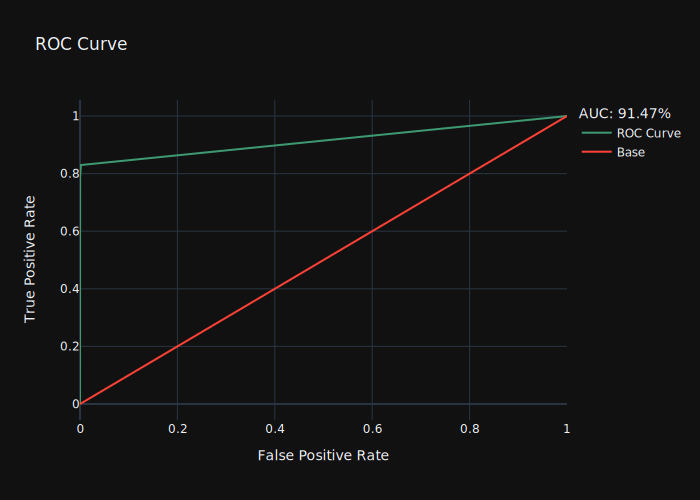

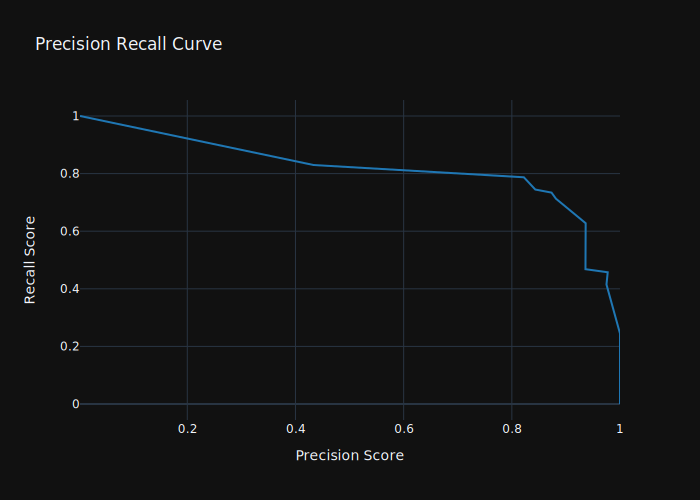

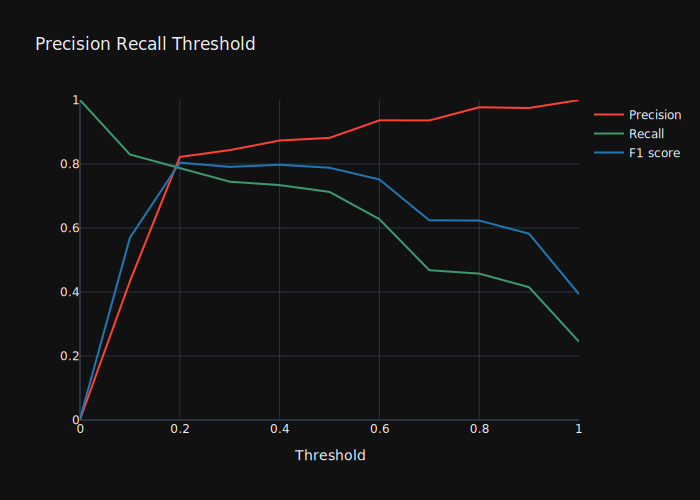

In [21]:
start = time.process_time()
real_time = dt.now()

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

pred_val = knn.predict(X_val)


print(f"Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(knn,X_val,y_val)

plotly_precision_recall_curve(knn,X_val,y_val)

plotly_precision_recall_curve2(knn,X_val,y_val)

- We're more interested in Recall, because of thath I chose 0.2 as threshold for the model, to increased the recall

In [22]:
start = time.process_time()
real_time = dt.now()

pred_val = knn.predict(X_val)

pred_new = new_threshold(knn,0.2,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

Previous Confusion Matrix of Validation Set: 
 
 [[56647     4]
 [   35    59]] 

New Confusion Matrix of Validation Set: 
 
 [[56635    16]
 [   20    74]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.63      0.75        94

    accuracy                           1.00     56745
   macro avg       0.97      0.81      0.88     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.79      0.80        94

    accuracy                           1.00     56745
   macro avg       0.91      0.89      0.90     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 3.34 minutes

 The Real time taken by the 

- KNeighbors algorithm takes too much time for each itereration, because of that I decided to use Randomized Search instead of Grid Search

In [23]:
start = time.process_time()
real_time = dt.now()

model_knn_rand = KNeighborsClassifier()

params_knn_rand = { 'n_neighbors':[5,8,10,12,14],'weights':['uniform','distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

from sklearn.model_selection import RandomizedSearchCV
random_search_knn_rand = RandomizedSearchCV(model_knn_rand,param_distributions=params_knn_rand,cv=skf,n_iter=5,scoring='f1_macro',n_jobs=-1, random_state=100)

random_search_knn_rand.fit(X_train,y_train)
print(random_search_knn_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'weights': 'distance', 'n_neighbors': 14, 'algorithm': 'ball_tree'}

 The Process time taken by the model was 0.04 minutes

 The Real time taken by the model was 7.17 minutes


Confusion Matrix of Testing Set: 
 
 [[56646     5]
 [   33    61]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.65      0.76        94

    accuracy                           1.00     56745
   macro avg       0.96      0.82      0.88     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 6.22 minutes

 The Real time taken by the model was 6.22 minutes


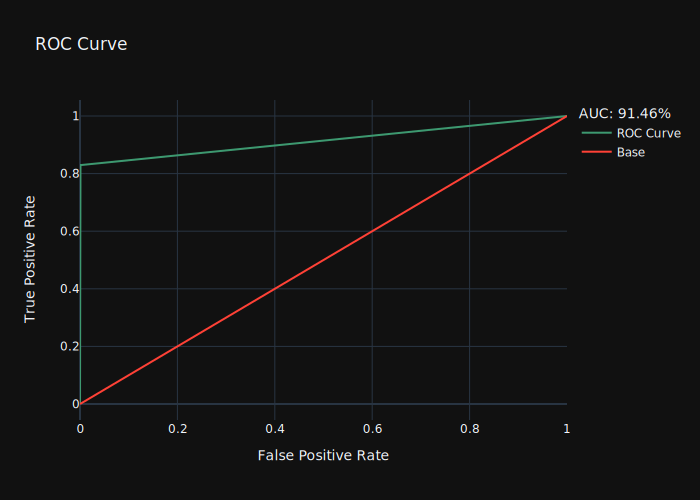

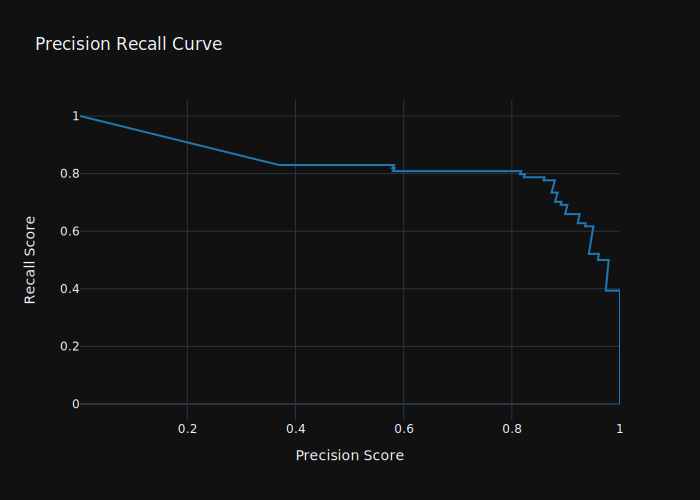

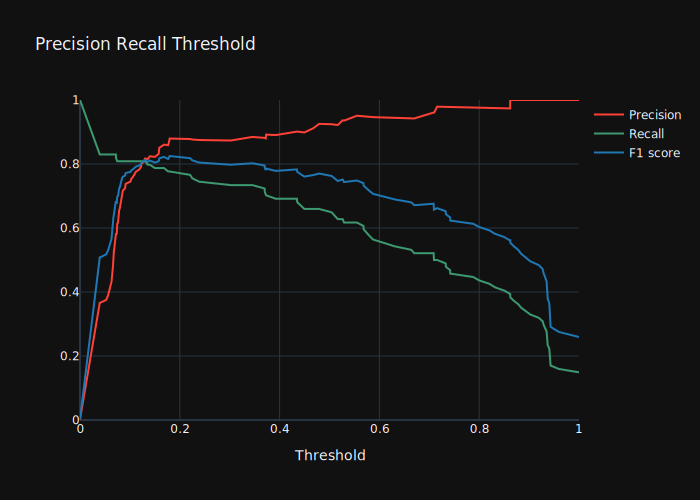

In [24]:
start = time.process_time()
real_time = dt.now()

best_knn = KNeighborsClassifier(**random_search_knn_rand.best_params_)
best_knn.fit(X_train,y_train)

pred_val = best_knn.predict(X_val)


print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")


print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_knn,X_val,y_val)

plotly_precision_recall_curve(best_knn,X_val,y_val)

plotly_precision_recall_curve2(best_knn,X_val,y_val)

In [25]:
start = time.process_time()
real_time = dt.now()

pred_val = best_knn.predict(X_val)

pred_new = new_threshold(best_knn,0.19,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

Previous Confusion Matrix of Validation Set: 
 
 [[56646     5]
 [   33    61]] 

New Confusion Matrix of Validation Set: 
 
 [[56641    10]
 [   22    72]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.65      0.76        94

    accuracy                           1.00     56745
   macro avg       0.96      0.82      0.88     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.77      0.82        94

    accuracy                           1.00     56745
   macro avg       0.94      0.88      0.91     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 12.33 minutes

 The Real time taken by the

***
***

# Logistic Regression

First let see how is the performance using the information without Over Sampling

Confusion Matrix of Validation Set: 
 
 [[56645     6]
 [   48    46]] 

Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.49      0.63        94

    accuracy                           1.00     56745
   macro avg       0.94      0.74      0.81     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.04 minutes

 The Real time taken by the model was 0.0 minutes


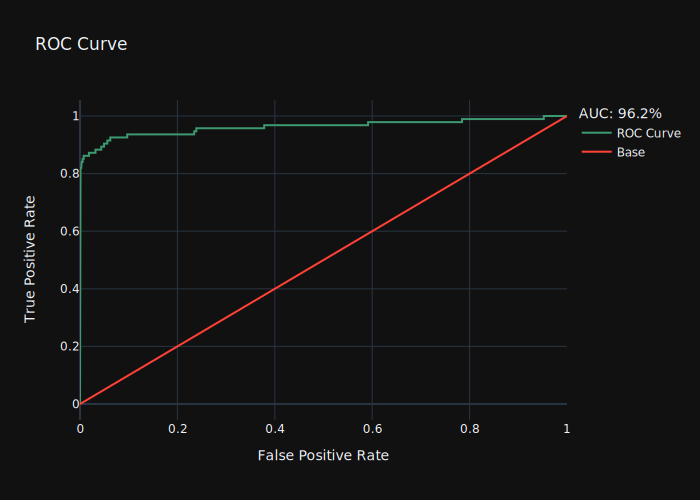

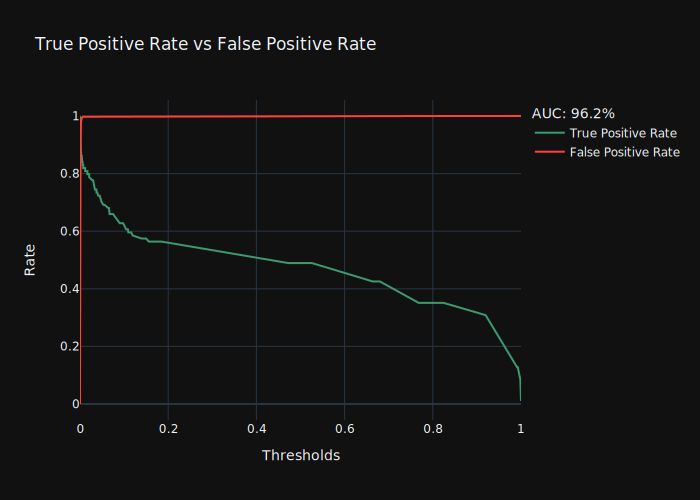

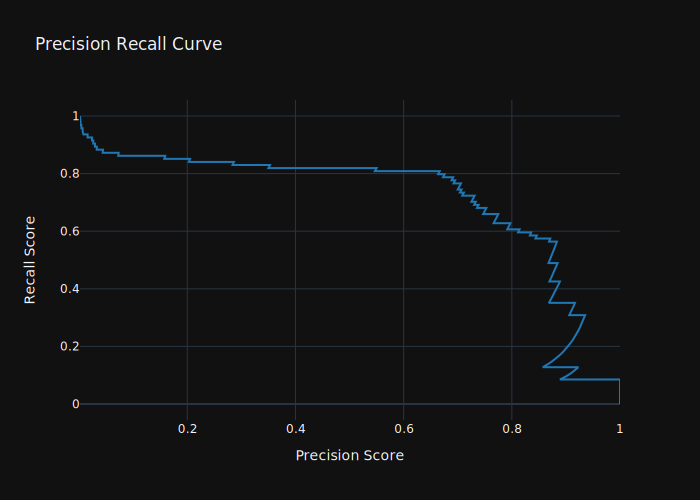

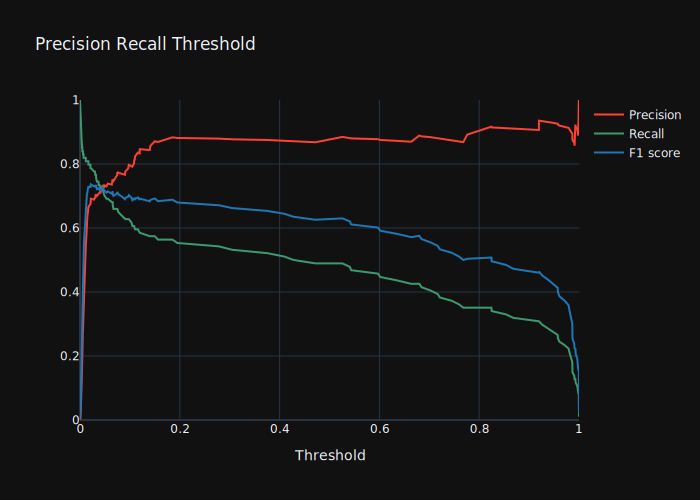

In [26]:
start = time.process_time()
real_time = dt.now()

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=100,max_iter=1000)
log.fit(X_train,y_train)


pred_val = log.predict(X_val)


print(f"Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(log,X_val,y_val)

plotly_auc_roc_curve2(log,X_val,y_val)

plotly_precision_recall_curve(log,X_val,y_val)

plotly_precision_recall_curve2(log,X_val,y_val)

- We are more interesting in improving the recall of the model, because of that we'll choose 0.025 as threshold. 

In [27]:
start = time.process_time()
real_time = dt.now()


pred_val = log.predict(X_val)

pred_new = new_threshold(log,0.04,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

Previous Confusion Matrix of Validation Set: 
 
 [[56645     6]
 [   48    46]] 

New Confusion Matrix of Validation Set: 
 
 [[56623    28]
 [   26    68]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.49      0.63        94

    accuracy                           1.00     56745
   macro avg       0.94      0.74      0.81     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.71      0.72      0.72        94

    accuracy                           1.00     56745
   macro avg       0.85      0.86      0.86     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.01 minutes

 The Real time taken by the 

In [28]:
start = time.process_time()
real_time = dt.now()

model_log = LogisticRegression()

params_log = { 'max_iter':[1000,1500,3000,5000],'penalty':['l2','l1'], 'C': np.logspace(-4,4,20),'solver': ['lbfgs','netwon-cg','liblinear','sag','saga'] }

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

from sklearn.model_selection import RandomizedSearchCV
random_search_log = RandomizedSearchCV(model_log,param_distributions=params_log, cv=skf,n_iter=5,scoring='f1_macro',n_jobs=-1, random_state=100)

random_search_log.fit(X_train,y_train)
print(random_search_log.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000, 'C': 10000.0}

 The Process time taken by the model was 0.03 minutes

 The Real time taken by the model was 0.2 minutes


- We can see how th recall in the second attempt improve from 0.49 to 0.72, however the price was that the precision drop from 0.88 to 0.71.

Confusion Matrix of Testing Set: 
 
 [[56643     8]
 [   50    44]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.47      0.60        94

    accuracy                           1.00     56745
   macro avg       0.92      0.73      0.80     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.03 minutes

 The Real time taken by the model was 0.02 minutes


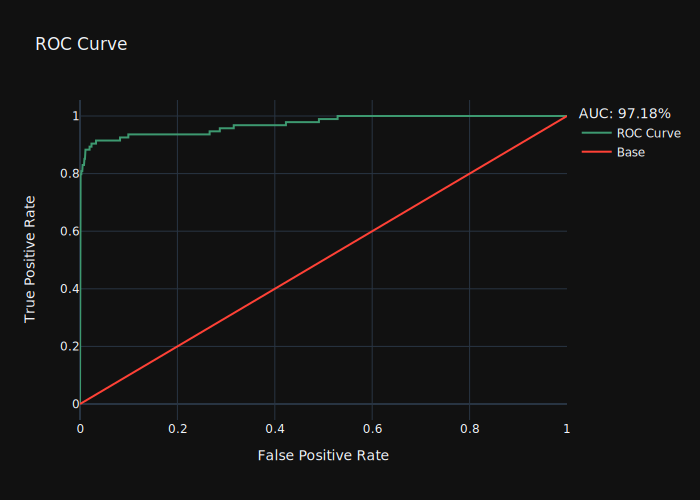

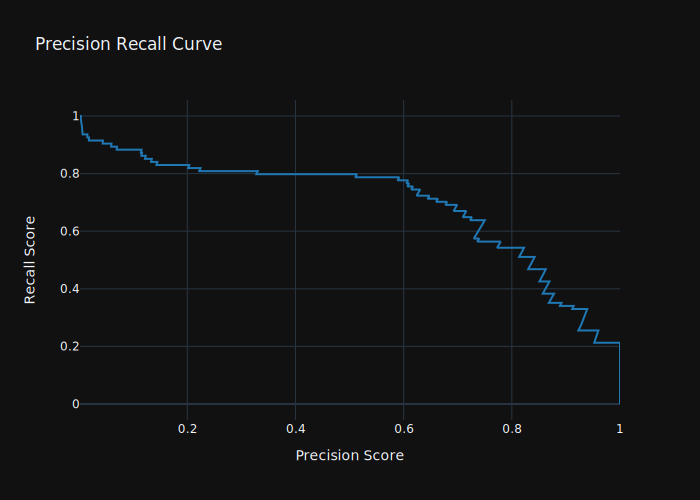

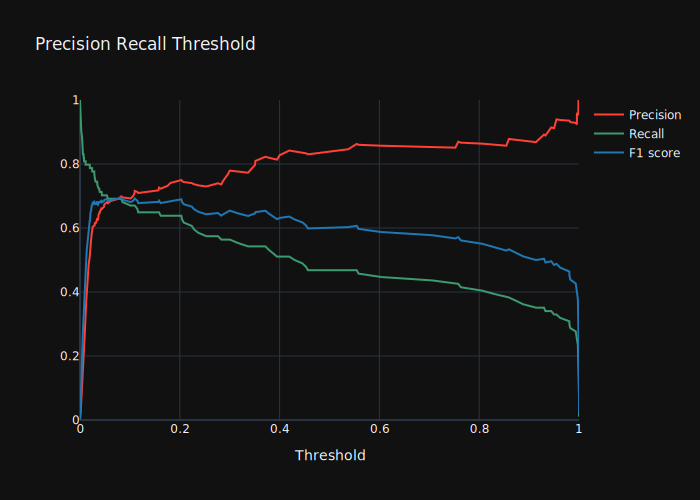

In [29]:
start = time.process_time()
real_time = dt.now()

best_log = LogisticRegression(**random_search_log.best_params_)
best_log.fit(X_train,y_train)

pred_val = best_log.predict(X_val)

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_log,X_val,y_val)

plotly_precision_recall_curve(best_log,X_val,y_val)

plotly_precision_recall_curve2(best_log,X_val,y_val)

In [30]:
start = time.process_time()
real_time = dt.now()

pred_val = best_log.predict(X_val)

pred_new = new_threshold(best_log,0.1,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

Previous Confusion Matrix of Validation Set: 
 
 [[56643     8]
 [   50    44]] 

New Confusion Matrix of Validation Set: 
 
 [[56623    28]
 [   31    63]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.47      0.60        94

    accuracy                           1.00     56745
   macro avg       0.92      0.73      0.80     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.69      0.67      0.68        94

    accuracy                           1.00     56745
   macro avg       0.85      0.83      0.84     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.01 minutes

 The Real time taken by the 

***
***
# Support Vector Classifier

First let see how performance the model without over sampling the data

In [71]:
start = time.process_time()
real_time = dt.now()

from sklearn.svm import SVC

svc = SVC(random_state=100)
svc.fit(X_train,y_train)

pred_val = svc.predict(X_val)

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(svc,X_val,y_val)

plotly_precision_recall_curve(svc,X_val,y_val)

plotly_precision_recall_curve2(svc,X_val,y_val)

Confusion Matrix of Testing Set: 
 
 [[56850    13]
 [   18    81]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.82      0.84        99

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


 The Process time taken by the model was 0.12 minutes

 The Real time taken by the model was 0.12 minutes


AttributeError: predict_proba is not available when probability=False

***
***
# Decision Tree Classifier

First let see how performance the model without over sampling the data

Confusion Matrix of Testing Set: 
 
 [[56636    15]
 [   29    65]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.69      0.75        94

    accuracy                           1.00     56745
   macro avg       0.91      0.85      0.87     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.14 minutes

 The Real time taken by the model was 0.13 minutes


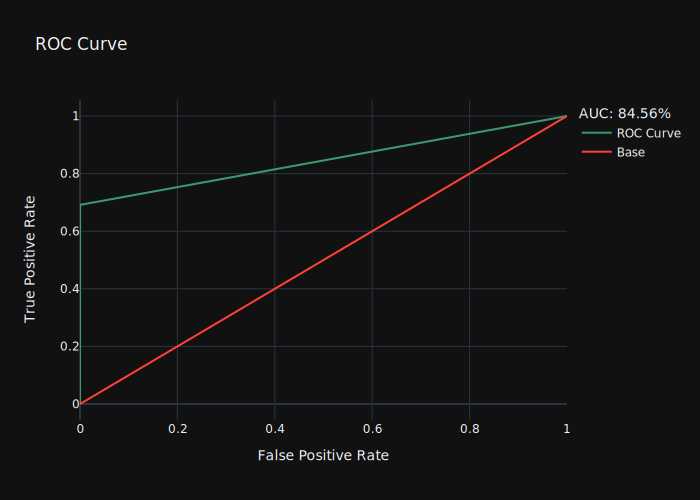

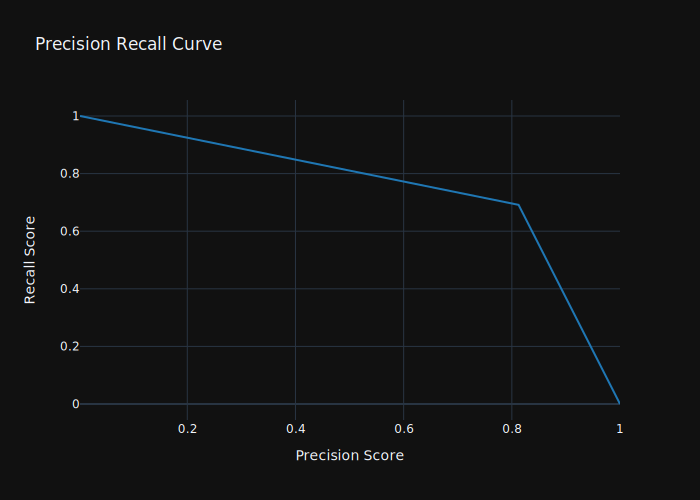

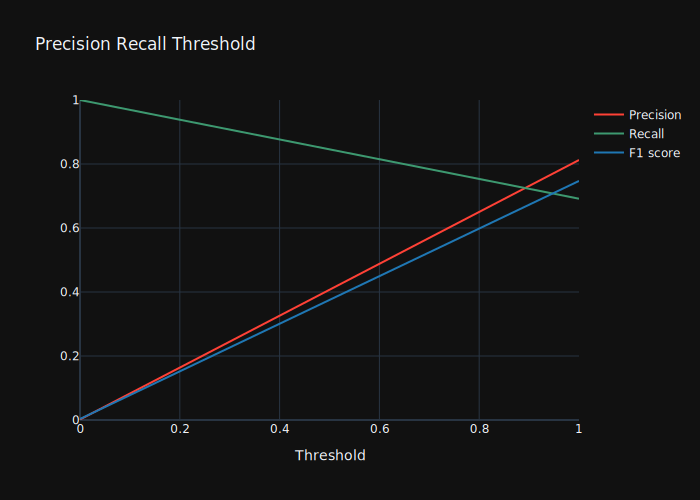

In [31]:
start = time.process_time()
real_time = dt.now()

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=100)
tree.fit(X_train,y_train)


pred_val = tree.predict(X_val)

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(tree,X_val,y_val)

plotly_precision_recall_curve(tree,X_val,y_val)

plotly_precision_recall_curve2(tree,X_val,y_val)

In [32]:
start = time.process_time()
real_time = dt.now()

model_tree_rand = DecisionTreeClassifier()

params_tree_rand = { 'max_depth':[2,4,6,8,10,14,18,20], 'random_state':[100], 'max_features':['sqrt','log2'], 'class_weight':['balanced'], 'min_samples_leaf':[5,10,15,20]}

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

from sklearn.model_selection import RandomizedSearchCV
random_search_log_rand = RandomizedSearchCV(model_tree_rand,param_distributions=params_tree_rand,cv=skf,n_iter=10,scoring='f1_macro',n_jobs=-1)

random_search_log_rand.fit(X_train,y_train)

print(random_search_log_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'random_state': 100, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}

 The Process time taken by the model was 0.02 minutes

 The Real time taken by the model was 0.15 minutes


Confusion Matrix of Testing Set: 
 
 [[56481   170]
 [   18    76]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.31      0.81      0.45        94

    accuracy                           1.00     56745
   macro avg       0.65      0.90      0.72     56745
weighted avg       1.00      1.00      1.00     56745



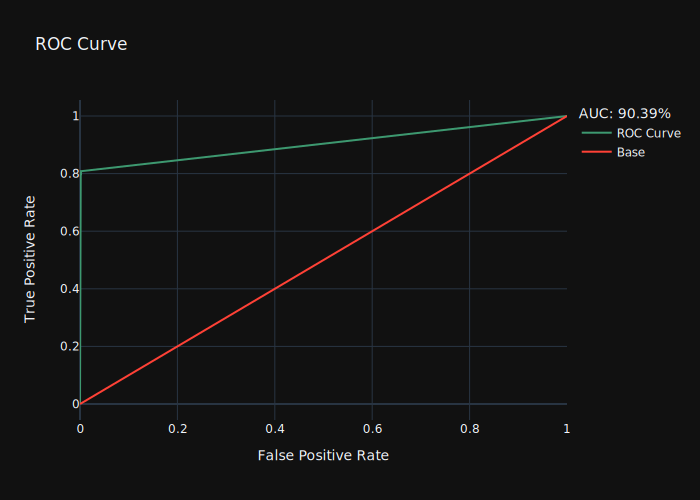

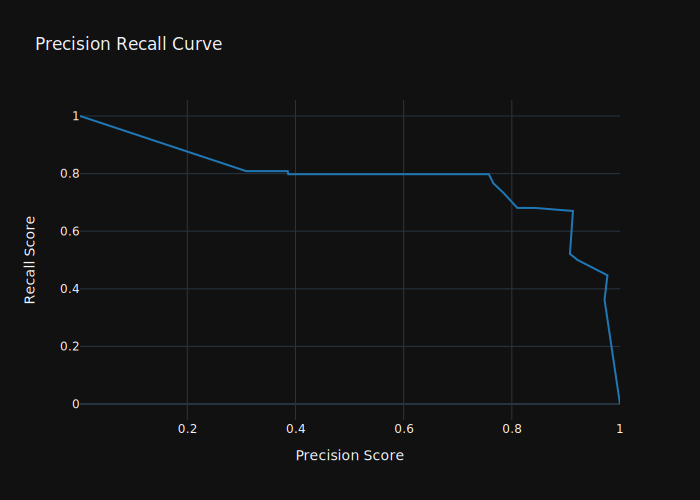

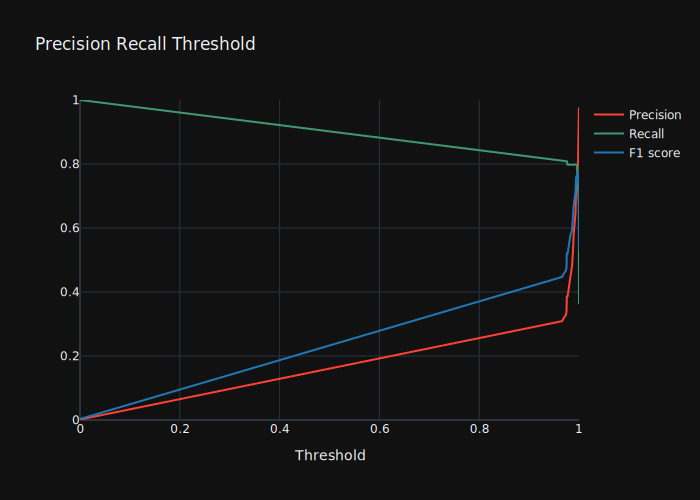


 The Process time taken by the model was 0.02 minutes

 The Real time taken by the model was 0.02 minutes


In [33]:
start = time.process_time()
real_time = dt.now()

best_tree = DecisionTreeClassifier(**random_search_log_rand.best_params_)
best_tree.fit(X_train,y_train)

pred_val = best_tree.predict(X_val)

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")

plotly_auc_roc_curve(best_tree,X_val,y_val)

plotly_precision_recall_curve(best_tree,X_val,y_val)

plotly_precision_recall_curve2(best_tree,X_val,y_val)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

***

# Random Forest Classifier

Confusion Matrix of Testing Set: 
 
 [[56644     7]
 [   29    65]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.69      0.78        94

    accuracy                           1.00     56745
   macro avg       0.95      0.85      0.89     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 1.64 minutes

 The Real time taken by the model was 1.63 minutes


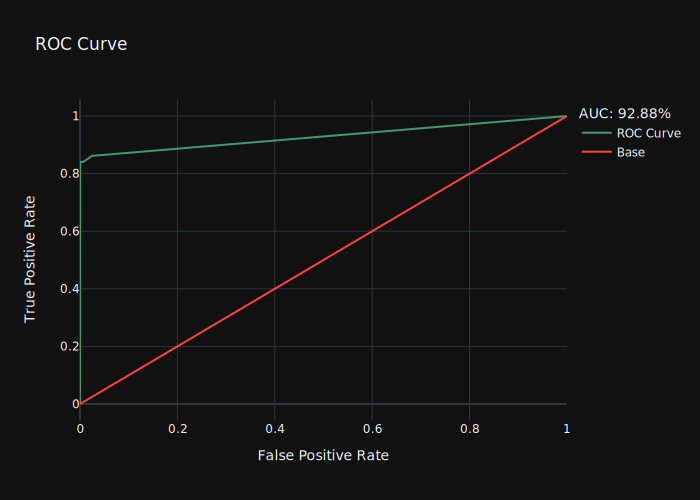

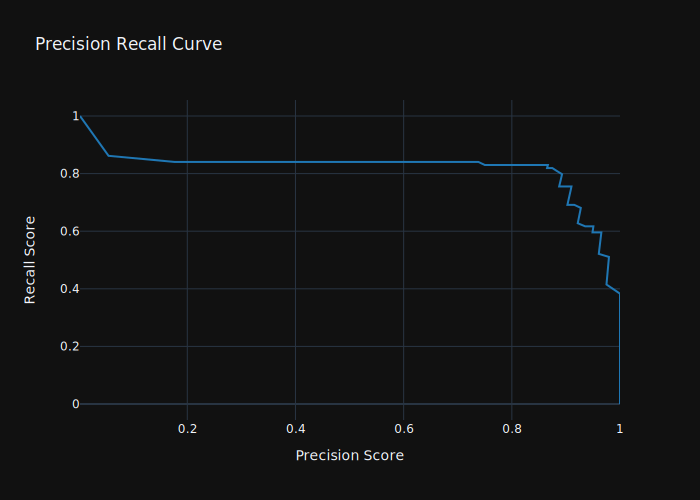

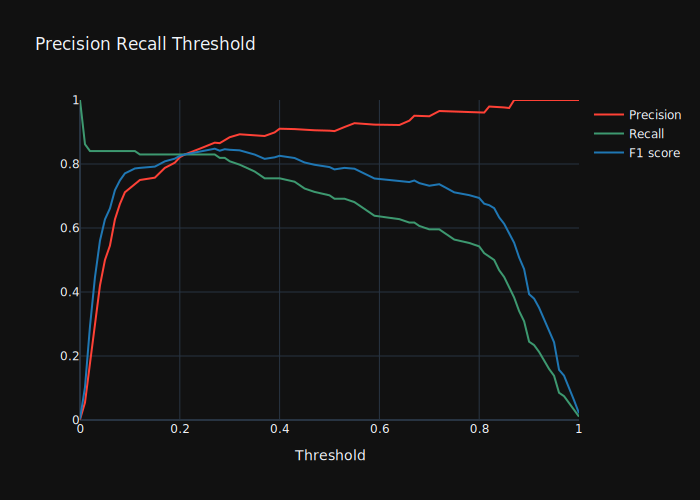

In [34]:
start = time.process_time()

real_time = dt.now()

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=100,n_estimators=100)
rfc.fit(X_train,y_train)

pred_val = rfc.predict(X_val)

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(rfc,X_val,y_val)

plotly_precision_recall_curve(rfc,X_val,y_val)

plotly_precision_recall_curve2(rfc,X_val,y_val)

In [35]:
start = time.process_time()
real_time = dt.now()

pred_val = rfc.predict(X_val)

pred_new = new_threshold(rfc,0.2,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

Previous Confusion Matrix of Validation Set: 
 
 [[56644     7]
 [   29    65]] 

New Confusion Matrix of Validation Set: 
 
 [[56634    17]
 [   16    78]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.69      0.78        94

    accuracy                           1.00     56745
   macro avg       0.95      0.85      0.89     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.83      0.83        94

    accuracy                           1.00     56745
   macro avg       0.91      0.91      0.91     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.01 minutes

 The Real time taken by the 

***
Looking for the best hyperparemeters we decided to use Randomized Search CV, due to the time taken by the Grid Search

In [36]:
start = time.process_time()
real_time = dt.now()

from sklearn.model_selection import RandomizedSearchCV

model_for_rand = RandomForestClassifier()

params_for_rand = {     'n_estimators' : [100,150],
                        'max_depth':[2,4,6,8],
                        'random_state':[100],
                        'max_features':['sqrt','log2'],
                        'class_weight':['balanced']
                  }

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

random_search_for_rand = RandomizedSearchCV(model_for_rand, param_distributions=params_for_rand,cv=skf, n_iter=5,scoring='f1_macro')

random_search_for_rand.fit(X_train,y_train)
print(random_search_for_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'random_state': 100, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 8, 'class_weight': 'balanced'}

 The Process time taken by the model was 9.98 minutes

 The Real time taken by the model was 9.98 minutes


Confusion Matrix of Testing Set: 
 
 [[56638    13]
 [   18    76]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.81      0.83        94

    accuracy                           1.00     56745
   macro avg       0.93      0.90      0.92     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.77 minutes

 The Real time taken by the model was 0.77 minutes


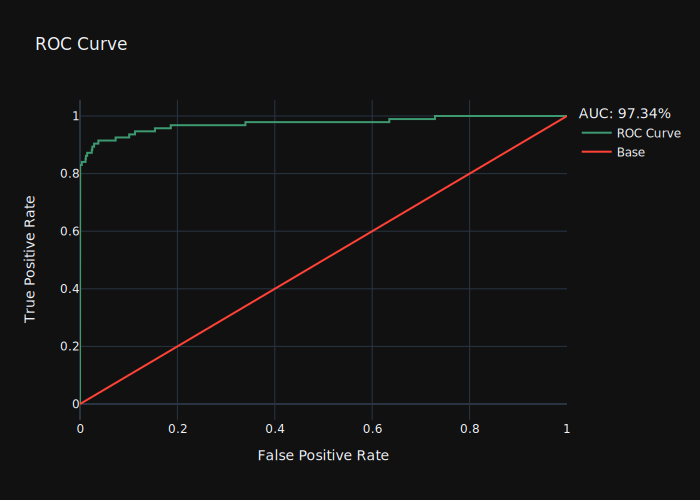

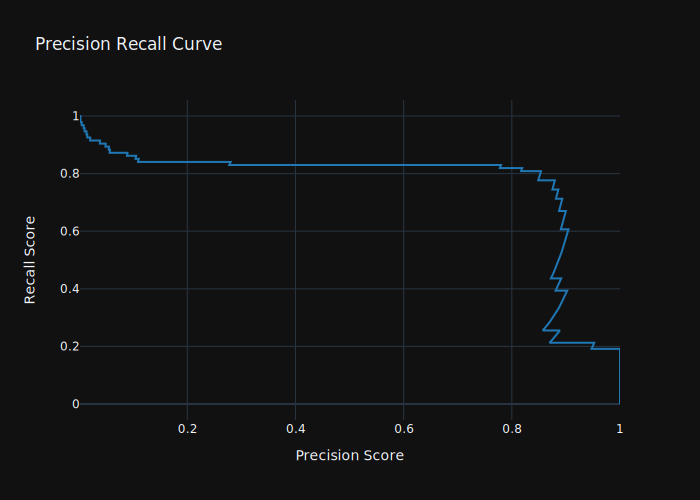

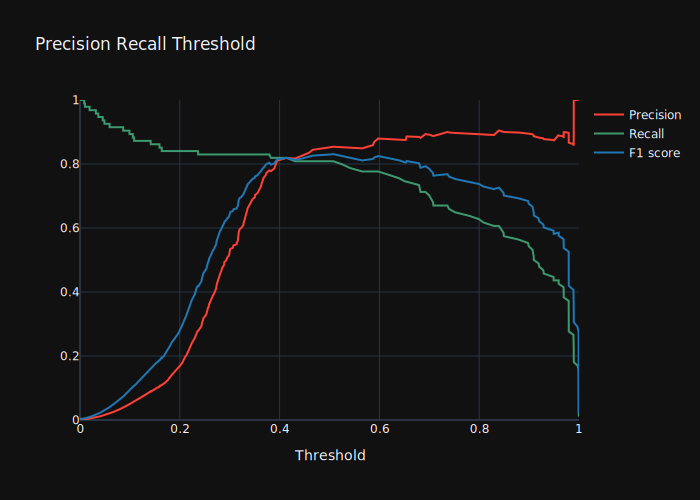

In [37]:
start = time.process_time()
real_time = dt.now()

best_forest = RandomForestClassifier(**random_search_for_rand.best_params_)
best_forest.fit(X_train,y_train)

pred_val = best_forest.predict(X_val)

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_forest,X_val,y_val)

plotly_precision_recall_curve(best_forest,X_val,y_val)

plotly_precision_recall_curve2(best_forest,X_val,y_val)

In [39]:
start = time.process_time()
real_time = dt.now()

pred_val = best_forest.predict(X_val)

pred_new = new_threshold(best_forest,0.4,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

Previous Confusion Matrix of Validation Set: 
 
 [[56638    13]
 [   18    76]] 

New Confusion Matrix of Validation Set: 
 
 [[56634    17]
 [   17    77]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.81      0.83        94

    accuracy                           1.00     56745
   macro avg       0.93      0.90      0.92     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.82      0.82        94

    accuracy                           1.00     56745
   macro avg       0.91      0.91      0.91     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.01 minutes

 The Real time taken by the 

***
***
# XGB Classifier

- Here we can see how performs the model without any changes in hyperparameters or over sampling the data

Confusion Matrix of Testing Set: 
 
 [[56644     7]
 [   21    73]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.78      0.84        94

    accuracy                           1.00     56745
   macro avg       0.96      0.89      0.92     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.14 minutes

 The Real time taken by the model was 0.02 minutes


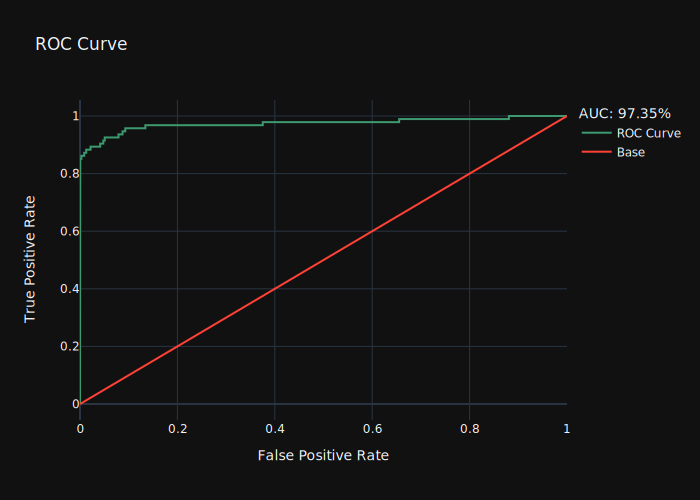

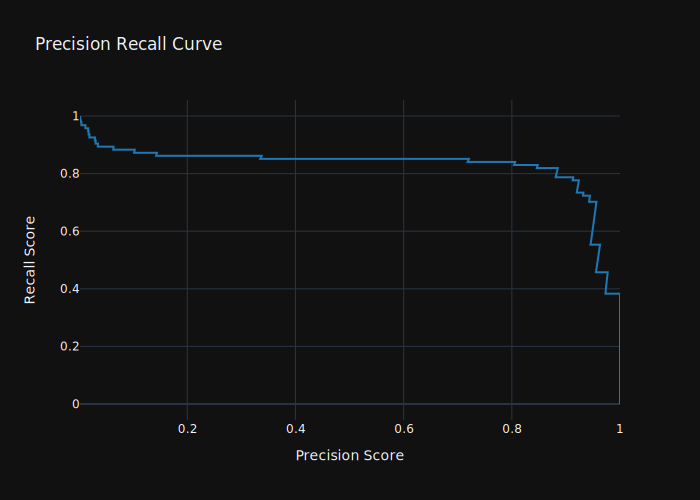

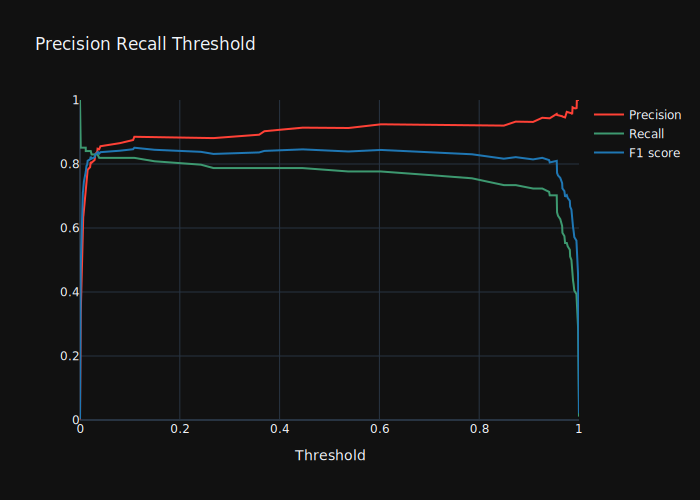

In [40]:
start = time.process_time()
real_time = dt.now()

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=100)
xgb.fit(X_train,y_train)

pred_val = xgb.predict(X_val)


print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")


print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(xgb,X_val,y_val)

plotly_precision_recall_curve(xgb,X_val,y_val)

plotly_precision_recall_curve2(xgb,X_val,y_val)


In [41]:
pred_val = xgb.predict(X_val)

pred_new = new_threshold(xgb,0.03,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

Previous Confusion Matrix of Validation Set: 
 
 [[56644     7]
 [   21    73]] 

New Confusion Matrix of Validation Set: 
 
 [[56634    17]
 [   16    78]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.78      0.84        94

    accuracy                           1.00     56745
   macro avg       0.96      0.89      0.92     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.83      0.83        94

    accuracy                           1.00     56745
   macro avg       0.91      0.91      0.91     56745
weighted avg       1.00      1.00      1.00     56745



- Let's look for the better hyperparameters for our model

In [42]:
start = time.process_time()
real_time = dt.now()

from sklearn.model_selection import RandomizedSearchCV


model_xgb_rand = XGBClassifier()

params_xgb_rand = {
                              'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
                                    'max_depth':[2,3,4,5],
                                    'min_child_weight':[1,3,5,7],
                                    'gamma':[0.0,0.1,0.2,0.3,0.4],
                                    'max_delta_step':[0,1,2,3,4,5,10,50,100,1000],
                                    'scale_pos_weight' : [1, 10, 75, 100, 1000]
}

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

random_search_xgb_rand = RandomizedSearchCV(model_xgb_rand,param_distributions=params_xgb_rand,n_iter=20,cv=skf,scoring='f1_macro',n_jobs=-1)

random_search_xgb_rand.fit(X_train,y_train)
print(random_search_xgb_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'scale_pos_weight': 1, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 2, 'learning_rate': 0.3, 'gamma': 0.0}

 The Process time taken by the model was 0.15 minutes

 The Real time taken by the model was 0.75 minutes


Confusion Matrix of Testing Set: 
 
 [[56643     8]
 [   19    75]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.80      0.85        94

    accuracy                           1.00     56745
   macro avg       0.95      0.90      0.92     56745
weighted avg       1.00      1.00      1.00     56745


 The Process time taken by the model was 0.09 minutes

 The Real time taken by the model was 0.02 minutes


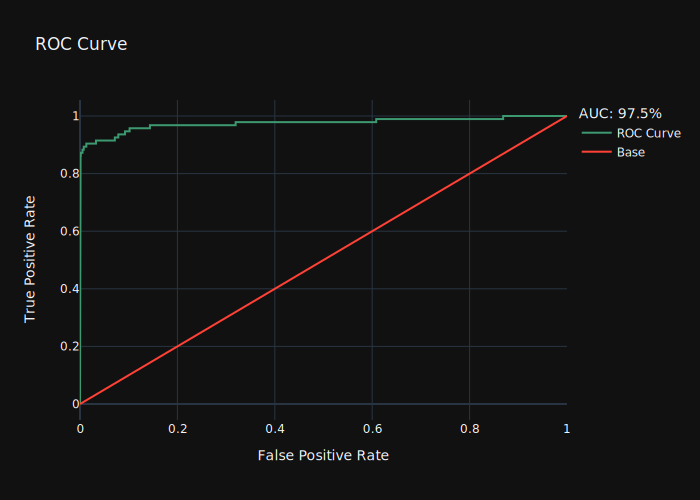

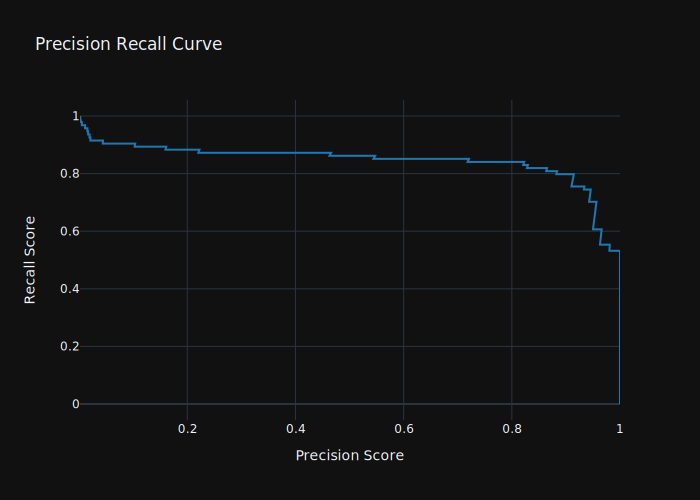

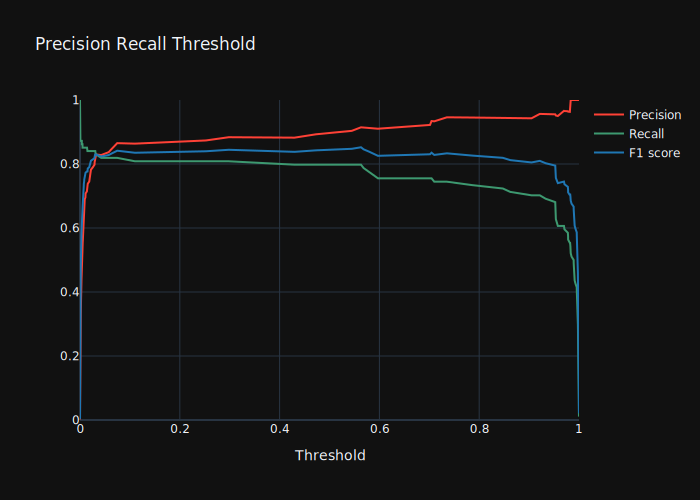

In [43]:
start = time.process_time()
real_time = dt.now()

best_xgb = XGBClassifier(**random_search_xgb_rand.best_params_)
best_xgb.fit(X_train,y_train)

pred_val = best_xgb.predict(X_val)

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_val,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_val,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_xgb,X_val,y_val)

plotly_precision_recall_curve(best_xgb,X_val,y_val)

plotly_precision_recall_curve2(best_xgb,X_val,y_val)

In [44]:
pred_val = best_xgb.predict(X_val)

pred_new = new_threshold(best_xgb,0.6,X_val)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_val,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_val,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_val,pred_new)}")

Previous Confusion Matrix of Validation Set: 
 
 [[56643     8]
 [   19    75]] 

New Confusion Matrix of Validation Set: 
 
 [[56645     6]
 [   23    71]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.80      0.85        94

    accuracy                           1.00     56745
   macro avg       0.95      0.90      0.92     56745
weighted avg       1.00      1.00      1.00     56745

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.76      0.83        94

    accuracy                           1.00     56745
   macro avg       0.96      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745



# 4. Best Algorithm

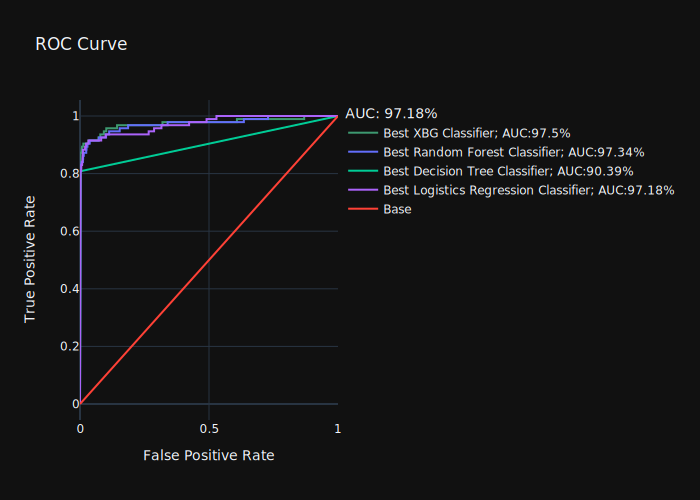

In [46]:
    
    
    pred_y_proba = best_xgb.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds = roc_curve(y_val,pred_y_proba)
    auc = roc_auc_score(y_val,pred_y_proba)
    trace0 = go.Scatter(x=fpr, y=tpr,name='Best XBG Classifier; AUC:'+ str((auc*100).round(2)) +'%',marker=dict(color='#3D9970'),mode='lines')
    
    pred_y_proba = best_forest.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds = roc_curve(y_val,pred_y_proba)
    auc = roc_auc_score(y_val,pred_y_proba)
    trace1 = go.Scatter(x=fpr, y=tpr,name='Best Random Forest Classifier; AUC:'+ str((auc*100).round(2)) +'%',marker=dict(color='#636EFA'),mode='lines')
    
    pred_y_proba = best_tree.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds = roc_curve(y_val,pred_y_proba)
    auc = roc_auc_score(y_val,pred_y_proba)
    trace2 = go.Scatter(x=fpr, y=tpr,name='Best Decision Tree Classifier; AUC:'+ str((auc*100).round(2)) +'%',marker=dict(color='#00CC96'),mode='lines')
    
    pred_y_proba = best_log.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds = roc_curve(y_val,pred_y_proba)
    auc = roc_auc_score(y_val,pred_y_proba)
    trace3 = go.Scatter(x=fpr, y=tpr,name='Best Logistics Regression Classifier; AUC:'+ str((auc*100).round(2)) +'%',marker=dict(color='#AB63FA'),mode='lines')
    
    
    
    trace10 = go.Scatter(x=[0,1], y=[0,1],name='Base',marker=dict(color='#FF4136'),mode='lines')
    
    data = [trace0,trace1,trace2,trace3,trace10]

    layout=go.Layout(
                    xaxis=dict(title='False Positive Rate'),
                    yaxis=dict(title='True Positive Rate'),
                    title='ROC Curve')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',legend_title_text='AUC:  ' + str((auc*100).round(2)) +'%')
    
    fig.show('svg')